In [2]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

**Importing the dataset**

In [3]:
data= pd.read_csv("/content/Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [4]:
data.drop(['User ID', 'Gender'], axis = 1, inplace = True)
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
x = data.iloc[:,:2].values
y = data.iloc[:,2].values


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

**Feature Scaling**

In [7]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

**Fitting Decision Tree Classification to the Training set**

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(x_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split



DecisionTreeClassifier()

**Predicting the Test set results**

In [9]:
# Predict test set labels
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [10]:
from sklearn.metrics import accuracy_score, roc_auc_score
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))

Test set accuracy: 0.87
Test set auc: 0.86


**Making the Confusion Matrix**

Confusion matrix:
 [[70  9]
 [ 7 34]]


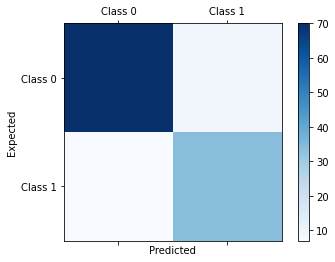

In [11]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

**Visualising the Training set results**

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


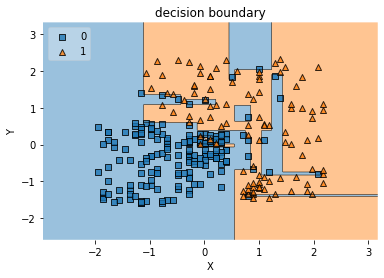

In [12]:
from mlxtend.plotting import plot_decision_regions
# Plotting decision region
plot_decision_regions(x_train, y_train, clf=dt, legend=2)
# Adding axes annotations
plt.xlabel('X')
plt.ylabel('Y')
plt.title('decision boundary')
plt.show()

**Visualising the Test set results**

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


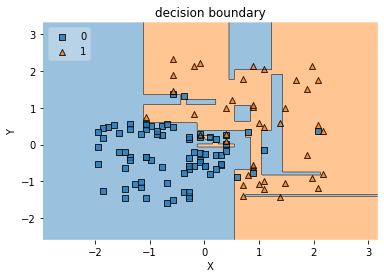

In [13]:
# Plotting decision region
plot_decision_regions(x_test, y_test, clf=dt, legend=2)
# Adding axes annotations
plt.xlabel('X')
plt.ylabel('Y')
plt.title('decision boundary')
plt.show()